# MNIST Keras

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11503399108394812559
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7247128398919342540
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7606687819327145014
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7259920794
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13905382670567019179
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
from keras.datasets import mnist
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

In [5]:
X_train_.shape

(60000, 28, 28)

In [6]:
y_train_.shape

(60000,)

In [7]:
# Reshape the training data to represent one-channel image input(grayscale)
img_rows, img_cols = X_train_[0].shape[0], X_train_[0].shape[1]
X_train = X_train_.reshape(X_train_.shape[0], img_rows, img_cols, 1)
X_test = X_test_.reshape(X_test_.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test.shape

(10000, 28, 28, 1)

In [10]:
#Convert to float32 and Normalize the input data:
X_train_std = X_train.astype('float32')/255.
X_test_std = X_test.astype('float32')/255.

In [11]:
from keras.utils import to_categorical
#One-hot encode the labels:
n_classes = len(set(y_train_)) #to get number of unique entities
y_train = to_categorical(y_train_, n_classes)
y_test = to_categorical(y_test_, n_classes)

/home/santosh/anaconda3/envs/iros/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


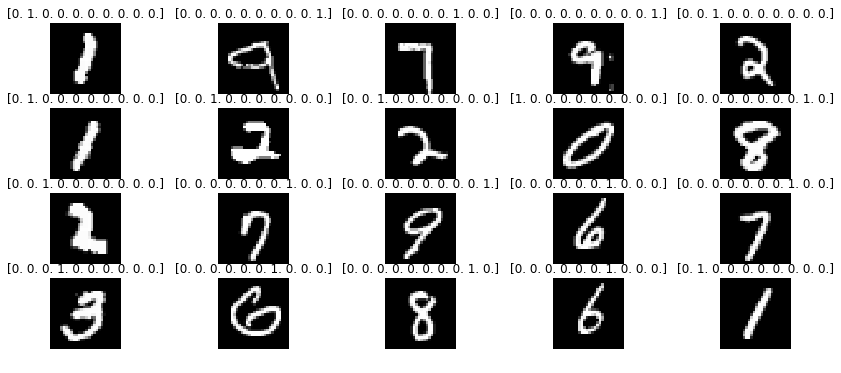

In [12]:
import random

fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train_std))
    axs[i].axis('off')
    axs[i].imshow(X_train_std[index, :, :, 0], cmap='gray')
    axs[i].set_title(y_train[index])

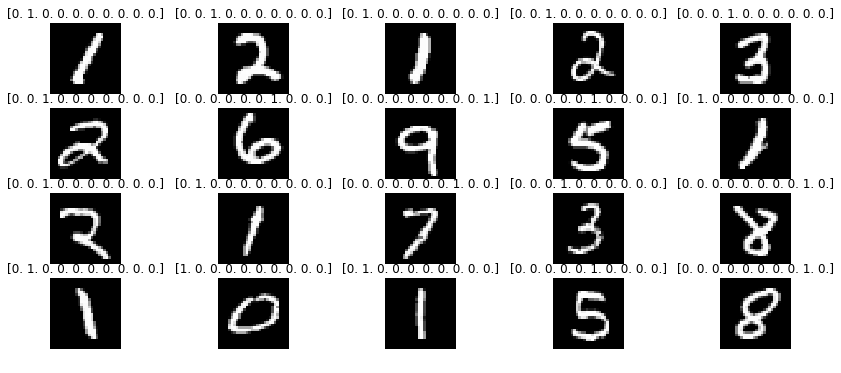

In [13]:
import random

fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_test_std))
    axs[i].axis('off')
    axs[i].imshow(X_test_std[index, :, :, 0], cmap='gray')
    axs[i].set_title(y_test[index])

In [14]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

In [15]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#hyperparameters
batch_size = 128
n_epochs = 20

In [17]:
history1 = model1.fit(X_train_std, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test_std, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.1876 - acc: 0.9433 - val_loss: 0.0444 - val_acc: 0.9865
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0696 - acc: 0.9788 - val_loss: 0.0375 - val_acc: 0.9882
Epoch 3/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.0304 - val_acc: 0.9911
Epoch 4/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0411 - acc: 0.9878 - val_loss: 0.0278 - val_acc: 0.9909
Epoch 5/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0362 - acc: 0.9886 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 6/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0319 - acc: 0.9897 - val_loss: 0.0280 - val_acc: 0.9911
Epoch 7/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0278 - acc: 0.9911 - val_loss: 0.

Text(0.5, 1.0, 'Accuracy Curves')

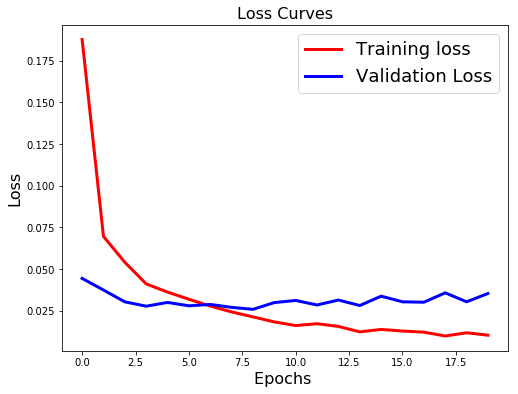

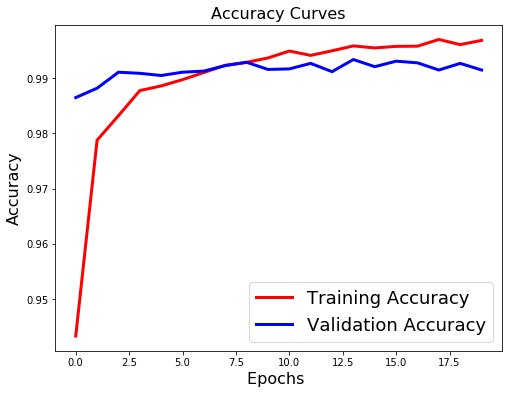

In [18]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [20]:
#Show the results on the test set:
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
score = model1.evaluate(X_test_std, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 91us/step
Test loss: 0.03536838979950817
Test accuracy: 0.9915


## Plot predicted

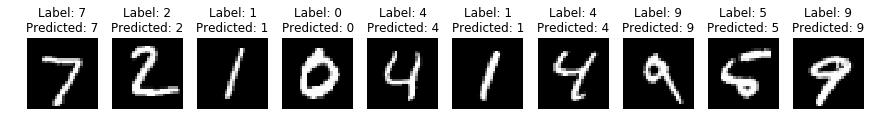

In [22]:
preds = model1.predict(X_test_std)
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(X_test_std[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
plt.show() 

## Plot misclassified

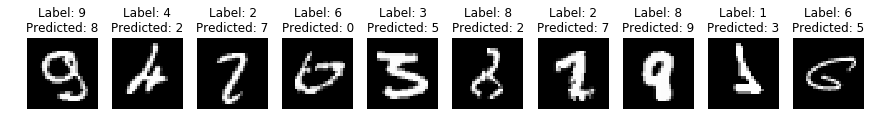

In [23]:
plt.figure(figsize=(15,15))
misc = 0
for i in range(len(y_test)):
    if(misc==10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:
        plt.subplot(1, n, misc + 1)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        misc+=1
plt.show()   